In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor 
from sklearn.linear_model import (LinearRegression, Ridge, Lasso, RandomizedLasso)
from sklearn.feature_selection import RFE, f_regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score

/usr/local/lib/python3.5/dist-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
df=pd.read_csv("dsaproject.csv")

In [3]:
df

,Unnamed: 0,status,developer,image_url,prize,prizepersqft,area,areatype,BHK,posted_date,...,nearest_railway_station,Dist_to_nearest_cinema,nearest_cinema,Dist_to_nearest_kindergarten,nearest_kindergarten,lower_area,higher_area,Unnamed: 0.1,No_of_fitness_centre_within_4km_x,No_of_fitness_centre_within_4km_y
0,0,Possession in Dec 2022,Synergy Realty,https://mediacdn.99acres.com/7062/17/141257223...,₹1.6 Cr,942,1750,Built-up Area,3.0,"Nov 15, 2018",...,Karmelaram,2.550351,Cinemax,1.504831,Floretz Montessori,1750.00,NaN,0,3,3
1,1,New Launch,Puravankara Projects Ltd,https://mediacdn.99acres.com/7325/4/146504211T...,₹73.62 L - 87.46 L,6656,1106 - 1314,Super built-up Area,3.0,(Dealer) ...,...,Nayandahalli,2.170056,Vaishnavi,2.872824,Roots Montessori,1106.00,1314.00,1,2,2
2,2,Possession in Nov 2022,Assetz,https://static.99acres.com//images/i0.gif,₹1.45 Cr,6402,2262,Super built-up Area,4.0,,...,Whitefield,1.104332,Inox Cinemas,0.155426,T.I.M.E Kids,2262.00,NaN,2,1,1
3,3,Possession in Nov 2022,Assetz,https://static.99acres.com//images/i0.gif,₹1.19 Cr - 1.66 Cr,8722,1366 - 1906,Super built-up Area,3.0,"Oct 29, 2018",...,Whitefield,1.104332,Inox Cinemas,0.155426,T.I.M.E Kids,1366.00,1906.00,2,1,1
4,4,Ready To Move,SV Constructions,https://static.99acres.com//images/i0.gif,₹80.3 L,5500,1460,Super built-up Area,3.0,(Builder),...,Whitefield,1.104332,Inox Cinemas,0.155426,T.I.M.E Kids,1460.00,NaN,2,1,1
5,5,Ready To Move,VBC Developers,https://static.99acres.com//images/i0.gif,₹67 L - 74.24 L,4765,1406 - 1558,Super built-up Area,3.0,"Dec 10, 2018",...,Tanisandra,1.267899,PVR entertainment,0.967055,TLC Montessori Preschool,1406.00,1558.00,3,0,0
6,6,Ready To Move,SV Constructions,https://static.99acres.com//images/i0.gif,₹53.63 L - 65.45 L,5500,975 - 1190,Super built-up Area,2.0,(Builder),...,Whitefield,1.104332,Inox Cinemas,0.155426,T.I.M.E Kids,975.00,1190.00,2,1,1
7,7,Ready To Move,Assetz,https://static.99acres.com//images/i0.gif,₹74.24 L,647,1157,Super built-up Area,3.0,"Dec 10, 2018",...,Karmelaram,2.729446,Cinemax,1.412828,Kidzee Play school,1157.00,NaN,4,5,5
8,8,Possession in Dec 2018,BSCPL Infrastructure Ltd,https://static.99acres.com//images/i0.gif,₹58.37 L - 67.18 L,499,1390 - 1600,Super built-up Area,3.0,(Builder),...,Whitefield,1.104332,Inox Cinemas,0.155426,T.I.M.E Kids,1390.00,1600.00,2,1,1
9,9,Ready To Move,Salarpuria Properties Pvt Ltd,https://static.99acres.com//images/i0.gif,₹1.15 Cr,6277,1832 - 2060,Super built-up Area,3.0,"Dec 10, 2018",...,Banaswadi,2.184009,PVR,0.374792,Shemrock Bright,1832.00,2060.00,5,4,4


In [4]:
df=df.iloc[:,1:-3]

### Take the important features

In [5]:
df1=df[['developer','BHK','location','bath','dist_nearest_hospital','No_of_restaurants_within_1.5km','dist_nearest_church','dist_nearest_temple','dist_nearest_mosque','No_of_schools_within_5km','dist_to_nearest_metro','Dist_to_nearest_railway_station','Dist_to_nearest_cinema','Dist_to_nearest_kindergarten','lower_area','lower_prize']]
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13233 entries, 0 to 13232
Data columns (total 16 columns):
developer                          13146 non-null object
BHK                                13132 non-null float64
location                           13132 non-null object
bath                               13233 non-null float64
dist_nearest_hospital              13233 non-null float64
No_of_restaurants_within_1.5km     13233 non-null int64
dist_nearest_church                13233 non-null float64
dist_nearest_temple                13233 non-null float64
dist_nearest_mosque                13233 non-null float64
No_of_schools_within_5km           13233 non-null int64
dist_to_nearest_metro              13233 non-null float64
Dist_to_nearest_railway_station    13233 non-null float64
Dist_to_nearest_cinema             13233 non-null float64
Dist_to_nearest_kindergarten       13233 non-null float64
lower_area                         13146 non-null float64
lower_prize                

In [6]:
df2=df1.dropna()
df2

,developer,BHK,location,bath,dist_nearest_hospital,No_of_restaurants_within_1.5km,dist_nearest_church,dist_nearest_temple,dist_nearest_mosque,No_of_schools_within_5km,dist_to_nearest_metro,Dist_to_nearest_railway_station,Dist_to_nearest_cinema,Dist_to_nearest_kindergarten,lower_area,lower_prize
0,Synergy Realty,3.0,"Haralur Road,bangalore,India",3.0,1.190247,6,1.707803,1.560149,2.406746,19,3.220736,4.605077,2.550351,1.504831,1750.00,160.00
1,Puravankara Projects Ltd,3.0,"Kanakpura Road,bangalore,India",3.0,0.740975,4,2.306811,1.180196,3.057898,34,1.054880,7.035270,2.170056,2.872824,1106.00,73.62
2,Assetz,4.0,"Whitefield,bangalore,India",4.0,1.201548,20,0.204469,0.243289,0.058414,27,1.798889,3.220494,1.104332,0.155426,2262.00,145.00
3,Assetz,3.0,"Whitefield,bangalore,India",3.0,1.201548,20,0.204469,0.243289,0.058414,27,1.798889,3.220494,1.104332,0.155426,1366.00,119.00
4,SV Constructions,3.0,"Whitefield,bangalore,India",3.0,1.201548,20,0.204469,0.243289,0.058414,27,1.798889,3.220494,1.104332,0.155426,1460.00,80.30
5,VBC Developers,3.0,"Thanisandra,bangalore,India",3.0,1.452569,6,1.509032,0.180758,0.855180,26,1.781693,1.087931,1.267899,0.967055,1406.00,67.00
6,SV Constructions,2.0,"Whitefield,bangalore,India",2.0,1.201548,20,0.204469,0.243289,0.058414,27,1.798889,3.220494,1.104332,0.155426,975.00,53.63
7,Assetz,3.0,"Sarjapur Road,bangalore,India",2.0,0.327669,21,1.284255,0.071625,0.115558,35,3.010893,6.337326,2.729446,1.412828,1157.00,74.24
8,BSCPL Infrastructure Ltd,3.0,"Whitefield,bangalore,India",3.0,1.201548,20,0.204469,0.243289,0.058414,27,1.798889,3.220494,1.104332,0.155426,1390.00,58.37
9,Salarpuria Properties Pvt Ltd,3.0,"Hennur Road,bangalore,India",3.0,0.354998,59,0.243373,0.705978,0.282956,46,1.155876,2.224589,2.184009,0.374792,1832.00,115.00


In [7]:
le = preprocessing.LabelEncoder()
df2['location']=le.fit_transform(df2['location'])

/home/mohammed/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


## Plot a geoheatmap using folium package with location and price

In [8]:
foliumdf=df[['lower_prize','latitude','longitude']]
foliumdf=foliumdf.dropna()
import folium
from folium.plugins import HeatMap

max_amount = float(foliumdf['lower_prize'].max())

hmap = folium.Map(location=[12.885767,77.552753])

hm_wide = HeatMap( list(zip(foliumdf.latitude.values, foliumdf.longitude.values, foliumdf.lower_prize.values)), 
                   min_opacity=0.2,
                   max_val=max_amount,
                   radius=10, blur=15, 
                   max_zoom=1, 
                 )


hmap.add_child(hm_wide)

## Plot a heatmap of pearson correlation of features

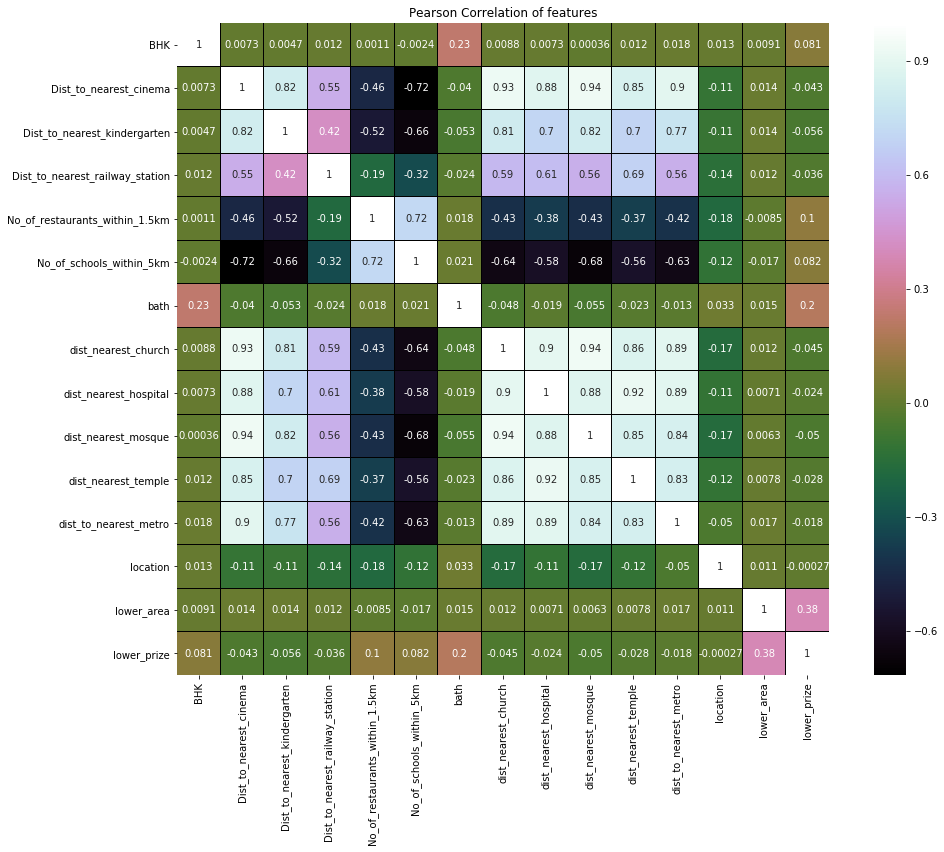

In [9]:
str_list = [] # empty list to contain columns with strings (words)
for colname, colvalue in df2.iteritems():
    if type(colvalue[1]) == str:
         str_list.append(colname)
# Get to the numeric columns by inversion            
num_list = df2.columns.difference(str_list) 
# Create Dataframe containing only numerical features
house_num = df2[num_list]
f, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation of features')
# Draw the heatmap using seaborn
#sns.heatmap(house_num.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, cmap="PuBuGn", linecolor='k', annot=True)
sns.heatmap(house_num.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, cmap="cubehelix", linecolor='k', annot=True)

## Creating the Feature Ranking Matrix

In [ ]:
ranks = {}
# Create our function which stores the feature rankings to the ranks dictionary
def ranking(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x,2), ranks)
    return dict(zip(names, ranks))

In [ ]:
colnames=['BHK', 'location', 'bath', 'dist_nearest_hospital',
       'No_of_restaurants_within_1.5km', 'dist_nearest_church',
       'dist_nearest_temple', 'dist_nearest_mosque',
       'No_of_schools_within_5km', 'dist_to_nearest_metro',
       'Dist_to_nearest_railway_station', 'Dist_to_nearest_cinema',
       'Dist_to_nearest_kindergarten', 'lower_area']

Recursive Feature Elimination ( RFE )
Linear Model Feature Ranking
Random Forest feature ranking

In [ ]:
# Using Linear Regression
lr = LinearRegression(normalize=True)
lr.fit(X_train_scaled,y_train)
ranks["LinReg"] = ranking(np.abs(lr.coef_), colnames)

# Using Ridge 
ridge = Ridge(alpha = 7)
ridge.fit(X_train_scaled,y_train)
ranks['Ridge'] = ranking(np.abs(ridge.coef_), colnames)

# Using Lasso
lasso = Lasso(alpha=.05)
lasso.fit(X_train_scaled,y_train)
ranks["Lasso"] = ranking(np.abs(lasso.coef_), colnames)



rf = RandomForestRegressor(n_jobs=-1, n_estimators=50, verbose=3)
rf.fit(X_train_scaled,y_train)
ranks["RF"] = ranking(rf.feature_importances_, colnames);


 #Finally let's run our Selection Stability method with Randomized Lasso
rlasso = RandomizedLasso(alpha=0.04)
rlasso.fit(X_train_scaled,y_train)
ranks["rlasso/Stability"] = ranking(np.abs(rlasso.scores_), colnames)


#stop the search when only the last feature is left
rfe = RFE(lr, n_features_to_select=1, verbose =3 )
rfe.fit(X_train_scaled,y_train)
ranks["RFE"] = ranking(list(map(float, rfe.ranking_)), colnames, order=-1)

In [ ]:
# Create empty dictionary to store the mean value calculated from all the scores
r = {}
for name in colnames:
    r[name] = round(np.mean([ranks[method][name] 
                             for method in ranks.keys()]), 2)
 
methods = sorted(ranks.keys())
ranks["Mean"] = r
methods.append("Mean")
 
print("\t%s" % "\t".join(methods))
for name in colnames:
    print("%s\t%s" % (name, "\t".join(map(str, 
                         [ranks[method][name] for method in methods]))))

In [10]:
df2

,developer,BHK,location,bath,dist_nearest_hospital,No_of_restaurants_within_1.5km,dist_nearest_church,dist_nearest_temple,dist_nearest_mosque,No_of_schools_within_5km,dist_to_nearest_metro,Dist_to_nearest_railway_station,Dist_to_nearest_cinema,Dist_to_nearest_kindergarten,lower_area,lower_prize
0,Synergy Realty,3.0,516,3.0,1.190247,6,1.707803,1.560149,2.406746,19,3.220736,4.605077,2.550351,1.504831,1750.00,160.00
1,Puravankara Projects Ltd,3.0,668,3.0,0.740975,4,2.306811,1.180196,3.057898,34,1.054880,7.035270,2.170056,2.872824,1106.00,73.62
2,Assetz,4.0,1246,4.0,1.201548,20,0.204469,0.243289,0.058414,27,1.798889,3.220494,1.104332,0.155426,2262.00,145.00
3,Assetz,3.0,1246,3.0,1.201548,20,0.204469,0.243289,0.058414,27,1.798889,3.220494,1.104332,0.155426,1366.00,119.00
4,SV Constructions,3.0,1246,3.0,1.201548,20,0.204469,0.243289,0.058414,27,1.798889,3.220494,1.104332,0.155426,1460.00,80.30
5,VBC Developers,3.0,1162,3.0,1.452569,6,1.509032,0.180758,0.855180,26,1.781693,1.087931,1.267899,0.967055,1406.00,67.00
6,SV Constructions,2.0,1246,2.0,1.201548,20,0.204469,0.243289,0.058414,27,1.798889,3.220494,1.104332,0.155426,975.00,53.63
7,Assetz,3.0,1039,2.0,0.327669,21,1.284255,0.071625,0.115558,35,3.010893,6.337326,2.729446,1.412828,1157.00,74.24
8,BSCPL Infrastructure Ltd,3.0,1246,3.0,1.201548,20,0.204469,0.243289,0.058414,27,1.798889,3.220494,1.104332,0.155426,1390.00,58.37
9,Salarpuria Properties Pvt Ltd,3.0,534,3.0,0.354998,59,0.243373,0.705978,0.282956,46,1.155876,2.224589,2.184009,0.374792,1832.00,115.00


In [14]:
df2=df2.iloc[:,1:]

In [15]:
x=df2.iloc[:,:-1]
y=df2.iloc[:,-1]

In [12]:
scalar=MinMaxScaler()

In [113]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,random_state=0)

In [112]:
X_scaled=scalar.fit_transform(x_poly)


### RandomForestRegressor

In [18]:
model=RandomForestRegressor()



In [19]:
model.fit(X_train,y_train)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [21]:
y_pred=model.predict(X_test)

In [22]:
r2_score(y_test,y_pred)

0.4773251501790283

In [23]:
y2_pred=model.predict(X_train)

In [24]:
r2_score(y_train,y2_pred)

0.9091793534117218

In [20]:

from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in range(5,500,10)]
# Number of features to consider at every split
max_features = [2,4,6,8,10,12,'auto']
# Maximum number of levels in tree
max_depth = [3,4,5,6,7]
#max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2,3,4,5,6]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1,2,3,4,5,6]
# Method of selecting samples for training each tree
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)



{'min_samples_leaf': [1, 2, 3, 4, 5, 6], 'n_estimators': [5, 15, 25, 35, 45, 55, 65, 75, 85, 95, 105, 115, 125, 135, 145, 155, 165, 175, 185, 195, 205, 215, 225, 235, 245, 255, 265, 275, 285, 295, 305, 315, 325, 335, 345, 355, 365, 375, 385, 395, 405, 415, 425, 435, 445, 455, 465, 475, 485, 495], 'max_features': [2, 4, 6, 8, 10, 12, 'auto'], 'bootstrap': [True, False], 'max_depth': [3, 4, 5, 6, 7], 'min_samples_split': [2, 3, 4, 5, 6]}


In [18]:
?model

In [21]:
rf_random = RandomizedSearchCV(estimator = model, param_distributions = random_grid, n_iter = 50, cv = 3, verbose=2, random_state=2, n_jobs = -1)

# Fit the random search model
rf_random.fit(X_train_scaled,y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   23.1s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  1.9min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=50, n_jobs=-1,
          param_distributions={'min_samples_leaf': [1, 2, 3, 4, 5, 6], 'n_estimators': [5, 15, 25, 35, 45, 55, 65, 75, 85, 95, 105, 115, 125, 135, 145, 155, 165, 175, 185, 195, 205, 215, 225, 235, 245, 255, 265, 275, 285, 295, 305, 315, 325, 335, 345, 355, 365, 375, 385, 395, 405, 415, 425, 435, 445, 455, 465, 475, 485, 495], 'max_features': [2, 4, 6, 8, 10, 12, 'auto'], 'bootstrap': [True, False], 'max_depth': [3, 4, 5, 6, 7], 'min_samples_split': [2, 3, 4, 5, 6]},

In [27]:
rf_random.set_params

<bound method BaseEstimator.set_params of RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=50, n_jobs=-1,
          param_distributions={'min_samples_leaf': [1, 2, 3, 4, 5, 6], 'n_estimators': [5, 15, 25, 35, 45, 55, 65, 75, 85, 95, 105, 115, 125, 135, 145, 155, 165, 175, 185, 195, 205, 215, 225, 235, 245, 255, 265, 275, 285, 295, 305, 315, 325, 335, 345, 355, 365, 375, 385, 395, 405, 415, 425, 435, 445, 455, 465, 475, 485, 495], 'max_features': [2, 4, 6, 8, 10, 12, 'auto'], 'bootstrap': [True, False], 'max_depth': [3, 4, 5, 6, 

### support vector regression

In [294]:
from sklearn.svm import SVR

In [295]:
model1=SVR(C=10000,kernel='linear',gamma='scale',epsilon=0.2)

In [ ]:
model1.fit(X_train,y_train)

In [ ]:
y_pred=model1.predict(X_test)

In [ ]:
r2_score(y_test,y_pred)

### LinearRegression

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
model2=LinearRegression()

In [23]:
model2.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [25]:
y_pred=model2.predict(X_test)

In [26]:
r2_score(y_test,y_pred)

-110371700707371.12

### GradientBoostingRegressor 

In [25]:
from sklearn.ensemble import GradientBoostingRegressor 

In [76]:
model3=GradientBoostingRegressor(alpha= 0.5,
 learning_rate=0.2,
 loss= 'huber',
 max_depth=8,
 min_samples_leaf=3,
 min_samples_split=3,
 n_estimators=6006)


In [77]:
model3.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.5, criterion='friedman_mse', init=None,
             learning_rate=0.2, loss='huber', max_depth=8,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=3, min_samples_split=3,
             min_weight_fraction_leaf=0.0, n_estimators=6006,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)

In [78]:
y_pred=model3.predict(X_test)

In [79]:
y_pred1=model3.predict(X_train)

In [80]:
r2_score(y_test,y_pred)

0.6115784947316478

In [81]:
r2_score(y_train,y_pred1)

0.9284382778362797

In [38]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in range(2,600)]
# Number of features to consider at every split

# Maximum number of levels in tree
max_depth = [3,4,5,6,7,8]
learning_rate=[0.2,0.1, 0.05, 0.02, 0.01,0.001]
alpha=[0.1,0.2,0.3,0.95]
loss=['ls', 'lad', 'huber', 'quantile']
#max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2,3,4,5,6]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1,2,3,4,5,6,7,8,9,10]
# Method of selecting samples for training each tree
random_grid = {'n_estimators': n_estimators,
               'loss':loss,
               'alpha':alpha,
               'learning_rate':learning_rate,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               }

print(random_grid)


{'alpha': [0.1, 0.2, 0.3, 0.95], 'loss': ['ls', 'lad', 'huber', 'quantile'], 'min_samples_split': [2, 3, 4, 5, 6], 'n_estimators': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196,

In [39]:
gb = RandomizedSearchCV(estimator = model3, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
gb.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] learning_rate=0.01, loss=lad, min_samples_split=5, n_estimators=506, min_samples_leaf=3, alpha=0.95, max_depth=7 
[CV] learning_rate=0.01, loss=lad, min_samples_split=5, n_estimators=506, min_samples_leaf=3, alpha=0.95, max_depth=7 
[CV] learning_rate=0.01, loss=lad, min_samples_split=5, n_estimators=506, min_samples_leaf=3, alpha=0.95, max_depth=7 
[CV] learning_rate=0.2, loss=huber, min_samples_split=3, n_estimators=26, min_samples_leaf=4, alpha=0.95, max_depth=4 
[CV] learning_rate=0.2, loss=huber, min_samples_split=3, n_estimators=26, min_samples_leaf=4, alpha=0.95, max_depth=4 
[CV] learning_rate=0.2, loss=huber, min_samples_split=3, n_estimators=26, min_samples_leaf=4, alpha=0.95, max_depth=4 
[CV] learning_rate=0.02, loss=ls, min_samples_split=3, n_estimators=363, min_samples_leaf=8, alpha=0.1, max_depth=5 
[CV] learning_rate=0.02, loss=ls, min_samples_split=3, n_estimators=363, min_samples_leaf=8, alpha=0.1, ma

[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   32.1s


[CV]  learning_rate=0.1, loss=lad, min_samples_split=5, n_estimators=235, min_samples_leaf=7, alpha=0.95, max_depth=7, total=   8.8s
[CV] learning_rate=0.01, loss=huber, min_samples_split=5, n_estimators=157, min_samples_leaf=9, alpha=0.1, max_depth=6 
[CV]  learning_rate=0.1, loss=lad, min_samples_split=5, n_estimators=235, min_samples_leaf=7, alpha=0.95, max_depth=7, total=   8.3s
[CV] learning_rate=0.01, loss=huber, min_samples_split=5, n_estimators=157, min_samples_leaf=9, alpha=0.1, max_depth=6 
[CV]  learning_rate=0.2, loss=lad, min_samples_split=2, n_estimators=495, min_samples_leaf=3, alpha=0.2, max_depth=4, total=   7.9s
[CV] learning_rate=0.01, loss=huber, min_samples_split=5, n_estimators=157, min_samples_leaf=9, alpha=0.1, max_depth=6 
[CV]  learning_rate=0.2, loss=lad, min_samples_split=2, n_estimators=495, min_samples_leaf=3, alpha=0.2, max_depth=4, total=   7.7s
[CV] learning_rate=0.2, loss=quantile, min_samples_split=3, n_estimators=455, min_samples_leaf=1, alpha=0.3, m

[CV] learning_rate=0.05, loss=quantile, min_samples_split=3, n_estimators=484, min_samples_leaf=10, alpha=0.3, max_depth=4 
[CV]  learning_rate=0.2, loss=quantile, min_samples_split=3, n_estimators=172, min_samples_leaf=3, alpha=0.3, max_depth=8, total=   9.6s
[CV] learning_rate=0.05, loss=huber, min_samples_split=5, n_estimators=438, min_samples_leaf=5, alpha=0.2, max_depth=3 
[CV]  learning_rate=0.05, loss=ls, min_samples_split=5, n_estimators=474, min_samples_leaf=1, alpha=0.2, max_depth=3, total=   5.0s
[CV] learning_rate=0.05, loss=huber, min_samples_split=5, n_estimators=438, min_samples_leaf=5, alpha=0.2, max_depth=3 
[CV]  learning_rate=0.1, loss=quantile, min_samples_split=4, n_estimators=535, min_samples_leaf=5, alpha=0.2, max_depth=6, total=  15.8s
[CV] learning_rate=0.05, loss=huber, min_samples_split=5, n_estimators=438, min_samples_leaf=5, alpha=0.2, max_depth=3 
[CV]  learning_rate=0.1, loss=quantile, min_samples_split=4, n_estimators=535, min_samples_leaf=5, alpha=0.2, 

[CV]  learning_rate=0.02, loss=huber, min_samples_split=5, n_estimators=154, min_samples_leaf=1, alpha=0.1, max_depth=8, total=  19.9s
[CV]  learning_rate=0.02, loss=huber, min_samples_split=5, n_estimators=154, min_samples_leaf=1, alpha=0.1, max_depth=8, total=  20.2s
[CV] learning_rate=0.01, loss=ls, min_samples_split=6, n_estimators=571, min_samples_leaf=9, alpha=0.95, max_depth=7 
[CV] learning_rate=0.02, loss=huber, min_samples_split=4, n_estimators=327, min_samples_leaf=1, alpha=0.3, max_depth=5 
[CV]  learning_rate=0.02, loss=lad, min_samples_split=4, n_estimators=177, min_samples_leaf=3, alpha=0.95, max_depth=6, total=   9.5s
[CV] learning_rate=0.02, loss=huber, min_samples_split=4, n_estimators=327, min_samples_leaf=1, alpha=0.3, max_depth=5 
[CV]  learning_rate=0.01, loss=huber, min_samples_split=3, n_estimators=81, min_samples_leaf=3, alpha=0.1, max_depth=8, total=  11.0s
[CV] learning_rate=0.02, loss=huber, min_samples_split=4, n_estimators=327, min_samples_leaf=1, alpha=0.

[CV] learning_rate=0.05, loss=huber, min_samples_split=5, n_estimators=386, min_samples_leaf=6, alpha=0.1, max_depth=5 
[CV]  learning_rate=0.05, loss=quantile, min_samples_split=5, n_estimators=584, min_samples_leaf=10, alpha=0.2, max_depth=6, total=  19.7s
[CV] learning_rate=0.05, loss=huber, min_samples_split=5, n_estimators=386, min_samples_leaf=6, alpha=0.1, max_depth=5 
[CV]  learning_rate=0.05, loss=quantile, min_samples_split=5, n_estimators=584, min_samples_leaf=10, alpha=0.2, max_depth=6, total=  19.6s
[CV] learning_rate=0.001, loss=quantile, min_samples_split=5, n_estimators=397, min_samples_leaf=10, alpha=0.1, max_depth=3 
[CV]  learning_rate=0.02, loss=huber, min_samples_split=6, n_estimators=525, min_samples_leaf=3, alpha=0.1, max_depth=8, total=  43.2s
[CV] learning_rate=0.001, loss=quantile, min_samples_split=5, n_estimators=397, min_samples_leaf=10, alpha=0.1, max_depth=3 
[CV]  learning_rate=0.2, loss=lad, min_samples_split=4, n_estimators=183, min_samples_leaf=1, alp

[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  3.8min


[CV]  learning_rate=0.1, loss=huber, min_samples_split=5, n_estimators=589, min_samples_leaf=3, alpha=0.95, max_depth=6, total=  21.7s
[CV] learning_rate=0.01, loss=ls, min_samples_split=2, n_estimators=454, min_samples_leaf=10, alpha=0.1, max_depth=8 
[CV]  learning_rate=0.01, loss=quantile, min_samples_split=6, n_estimators=292, min_samples_leaf=9, alpha=0.1, max_depth=8, total=  24.5s
[CV] learning_rate=0.01, loss=ls, min_samples_split=2, n_estimators=454, min_samples_leaf=10, alpha=0.1, max_depth=8 
[CV]  learning_rate=0.01, loss=quantile, min_samples_split=6, n_estimators=292, min_samples_leaf=9, alpha=0.1, max_depth=8, total=  24.7s
[CV] learning_rate=0.02, loss=lad, min_samples_split=2, n_estimators=341, min_samples_leaf=1, alpha=0.3, max_depth=4 
[CV]  learning_rate=0.01, loss=ls, min_samples_split=2, n_estimators=454, min_samples_leaf=10, alpha=0.1, max_depth=8, total=  15.2s
[CV] learning_rate=0.02, loss=lad, min_samples_split=2, n_estimators=341, min_samples_leaf=1, alpha=0.

[CV] learning_rate=0.1, loss=quantile, min_samples_split=6, n_estimators=60, min_samples_leaf=10, alpha=0.1, max_depth=3 
[CV]  learning_rate=0.1, loss=quantile, min_samples_split=6, n_estimators=60, min_samples_leaf=10, alpha=0.1, max_depth=3, total=   1.1s
[CV] learning_rate=0.1, loss=quantile, min_samples_split=6, n_estimators=60, min_samples_leaf=10, alpha=0.1, max_depth=3 
[CV]  learning_rate=0.1, loss=quantile, min_samples_split=6, n_estimators=60, min_samples_leaf=10, alpha=0.1, max_depth=3, total=   1.1s
[CV] learning_rate=0.1, loss=quantile, min_samples_split=6, n_estimators=60, min_samples_leaf=10, alpha=0.1, max_depth=3 
[CV]  learning_rate=0.1, loss=quantile, min_samples_split=6, n_estimators=60, min_samples_leaf=10, alpha=0.1, max_depth=3, total=   1.0s
[CV] learning_rate=0.1, loss=ls, min_samples_split=2, n_estimators=338, min_samples_leaf=1, alpha=0.2, max_depth=8 
[CV]  learning_rate=0.02, loss=huber, min_samples_split=4, n_estimators=135, min_samples_leaf=10, alpha=0.9

[CV] learning_rate=0.2, loss=huber, min_samples_split=6, n_estimators=40, min_samples_leaf=9, alpha=0.2, max_depth=6 
[CV]  learning_rate=0.05, loss=huber, min_samples_split=5, n_estimators=64, min_samples_leaf=2, alpha=0.3, max_depth=6, total=   4.5s
[CV] learning_rate=0.2, loss=huber, min_samples_split=6, n_estimators=40, min_samples_leaf=9, alpha=0.2, max_depth=6 
[CV]  learning_rate=0.2, loss=huber, min_samples_split=6, n_estimators=40, min_samples_leaf=9, alpha=0.2, max_depth=6, total=   1.9s
[CV] learning_rate=0.2, loss=huber, min_samples_split=6, n_estimators=40, min_samples_leaf=9, alpha=0.2, max_depth=6 
[CV]  learning_rate=0.2, loss=huber, min_samples_split=6, n_estimators=40, min_samples_leaf=9, alpha=0.2, max_depth=6, total=   1.8s
[CV] learning_rate=0.01, loss=lad, min_samples_split=2, n_estimators=56, min_samples_leaf=2, alpha=0.95, max_depth=5 
[CV]  learning_rate=0.05, loss=lad, min_samples_split=6, n_estimators=505, min_samples_leaf=1, alpha=0.1, max_depth=7, total=  1

[CV]  learning_rate=0.2, loss=ls, min_samples_split=2, n_estimators=204, min_samples_leaf=3, alpha=0.95, max_depth=8, total=   6.6s
[CV] learning_rate=0.1, loss=huber, min_samples_split=6, n_estimators=39, min_samples_leaf=5, alpha=0.2, max_depth=7 
[CV]  learning_rate=0.001, loss=ls, min_samples_split=4, n_estimators=520, min_samples_leaf=2, alpha=0.2, max_depth=6, total=  15.5s
[CV] learning_rate=0.1, loss=huber, min_samples_split=6, n_estimators=39, min_samples_leaf=5, alpha=0.2, max_depth=7 
[CV]  learning_rate=0.1, loss=huber, min_samples_split=6, n_estimators=39, min_samples_leaf=5, alpha=0.2, max_depth=7, total=   3.9s
[CV] learning_rate=0.1, loss=huber, min_samples_split=6, n_estimators=39, min_samples_leaf=5, alpha=0.2, max_depth=7 
[CV]  learning_rate=0.2, loss=ls, min_samples_split=2, n_estimators=204, min_samples_leaf=3, alpha=0.95, max_depth=8, total=   6.6s
[CV] learning_rate=0.05, loss=huber, min_samples_split=2, n_estimators=500, min_samples_leaf=8, alpha=0.95, max_dept

[CV]  learning_rate=0.02, loss=huber, min_samples_split=6, n_estimators=426, min_samples_leaf=10, alpha=0.2, max_depth=5, total=  13.3s
[CV] learning_rate=0.05, loss=ls, min_samples_split=4, n_estimators=290, min_samples_leaf=10, alpha=0.2, max_depth=7 
[CV]  learning_rate=0.02, loss=huber, min_samples_split=6, n_estimators=426, min_samples_leaf=10, alpha=0.2, max_depth=5, total=  14.0s
[CV] learning_rate=0.02, loss=ls, min_samples_split=3, n_estimators=599, min_samples_leaf=8, alpha=0.2, max_depth=4 
[CV]  learning_rate=0.02, loss=huber, min_samples_split=4, n_estimators=476, min_samples_leaf=3, alpha=0.2, max_depth=6, total=  27.3s
[CV] learning_rate=0.02, loss=ls, min_samples_split=3, n_estimators=599, min_samples_leaf=8, alpha=0.2, max_depth=4 
[CV]  learning_rate=0.05, loss=ls, min_samples_split=4, n_estimators=290, min_samples_leaf=10, alpha=0.2, max_depth=7, total=   7.9s
[CV] learning_rate=0.02, loss=ls, min_samples_split=3, n_estimators=599, min_samples_leaf=8, alpha=0.2, max_

[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  8.6min finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=100, n_jobs=-1,
          param_distributions={'alpha': [0.1, 0.2, 0.3, 0.95], 'loss': ['ls', 'lad', 'huber', 'quantile'], 'min_samples_split': [2, 3, 4, 5, 6], 'n_estimators': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, ...7, 8, 9, 10], 'learning_rate': [0.2, 0.1, 0.05, 0.02, 0.01, 0.001], 'max_depth': [3, 4, 5, 6, 7, 8]},
   

In [40]:
gb.best_params_

{'alpha': 0.1,
 'learning_rate': 0.02,
 'loss': 'huber',
 'max_depth': 8,
 'min_samples_leaf': 3,
 'min_samples_split': 6,
 'n_estimators': 525}

### Ridge Regression

In [82]:
from sklearn.linear_model import Ridge

In [83]:
model5=Ridge(alpha=0.01)

In [85]:
model5.fit(X_train,y_train)

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [87]:
y_pred=model5.predict(X_test)

In [88]:
r2_score(y_test,y_pred)

0.23012294748122608

### Lasso

In [89]:
from sklearn.linear_model import Lasso

In [90]:
model6=Lasso()

In [92]:
y_pred=model5.predict(X_test)
r2_score(y_test,y_pred)

0.23012294748122608

### RandomizedLasso

In [91]:
from sklearn.linear_model import RandomizedLasso

In [93]:
model6=RandomizedLasso()

/home/mohammed/.local/lib/python3.5/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class RandomizedLasso is deprecated; The class RandomizedLasso is deprecated in 0.19 and will be removed in 0.21.
  warnings.warn(msg, category=DeprecationWarning)


In [94]:
model6.fit(X_train_scaled,y_train)

/home/mohammed/.local/lib/python3.5/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Memory is deprecated; deprecated in version 0.20.1 to be removed in version 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib.
  warnings.warn(msg, category=DeprecationWarning)
/home/mohammed/.local/lib/python3.5/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Parallel is deprecated; deprecated in version 0.20.1 to be removed in version 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib.
  warnings.warn(msg, category=DeprecationWarning)
/home/mohammed/.local/lib/python3.5/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function delayed is deprecated; deprecated in version 0.20.1 to be removed in version 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib.
  warning

/home/mohammed/.local/lib/python3.5/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function delayed is deprecated; deprecated in version 0.20.1 to be removed in version 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib.
  warnings.warn(msg, category=DeprecationWarning)
/home/mohammed/.local/lib/python3.5/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function delayed is deprecated; deprecated in version 0.20.1 to be removed in version 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib.
  warnings.warn(msg, category=DeprecationWarning)
/home/mohammed/.local/lib/python3.5/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function delayed is deprecated; deprecated in version 0.20.1 to be removed in version 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib.
  w

/home/mohammed/.local/lib/python3.5/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function delayed is deprecated; deprecated in version 0.20.1 to be removed in version 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib.
  warnings.warn(msg, category=DeprecationWarning)
/home/mohammed/.local/lib/python3.5/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function delayed is deprecated; deprecated in version 0.20.1 to be removed in version 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib.
  warnings.warn(msg, category=DeprecationWarning)
/home/mohammed/.local/lib/python3.5/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function delayed is deprecated; deprecated in version 0.20.1 to be removed in version 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib.
  w

/home/mohammed/.local/lib/python3.5/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function delayed is deprecated; deprecated in version 0.20.1 to be removed in version 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib.
  warnings.warn(msg, category=DeprecationWarning)
/home/mohammed/.local/lib/python3.5/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function delayed is deprecated; deprecated in version 0.20.1 to be removed in version 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib.
  warnings.warn(msg, category=DeprecationWarning)
/home/mohammed/.local/lib/python3.5/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function delayed is deprecated; deprecated in version 0.20.1 to be removed in version 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib.
  w

/home/mohammed/.local/lib/python3.5/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function delayed is deprecated; deprecated in version 0.20.1 to be removed in version 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib.
  warnings.warn(msg, category=DeprecationWarning)
/home/mohammed/.local/lib/python3.5/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function delayed is deprecated; deprecated in version 0.20.1 to be removed in version 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib.
  warnings.warn(msg, category=DeprecationWarning)
/home/mohammed/.local/lib/python3.5/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function delayed is deprecated; deprecated in version 0.20.1 to be removed in version 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib.
  w

/home/mohammed/.local/lib/python3.5/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function delayed is deprecated; deprecated in version 0.20.1 to be removed in version 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib.
  warnings.warn(msg, category=DeprecationWarning)
/home/mohammed/.local/lib/python3.5/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function delayed is deprecated; deprecated in version 0.20.1 to be removed in version 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib.
  warnings.warn(msg, category=DeprecationWarning)
/home/mohammed/.local/lib/python3.5/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function delayed is deprecated; deprecated in version 0.20.1 to be removed in version 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib.
  w

/home/mohammed/.local/lib/python3.5/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function delayed is deprecated; deprecated in version 0.20.1 to be removed in version 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib.
  warnings.warn(msg, category=DeprecationWarning)
/home/mohammed/.local/lib/python3.5/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function delayed is deprecated; deprecated in version 0.20.1 to be removed in version 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib.
  warnings.warn(msg, category=DeprecationWarning)
/home/mohammed/.local/lib/python3.5/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function delayed is deprecated; deprecated in version 0.20.1 to be removed in version 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib.
  w

RandomizedLasso(alpha='aic', eps=2.220446049250313e-16, fit_intercept=True,
        max_iter=500, memory=None, n_jobs=None, n_resampling=200,
        normalize=True, pre_dispatch='3*n_jobs', precompute='auto',
        random_state=None, sample_fraction=0.75, scaling=0.5,
        selection_threshold=0.25, verbose=False)

In [100]:
model6.scores_

array([1.   , 0.805, 1.   , 0.87 , 1.   , 1.   , 0.97 , 0.415, 1.   ,
       1.   , 1.   , 0.44 , 0.79 , 1.   ])

In [275]:
y2_pred=model6.predict(X_train_scaled)

In [276]:
r2_score(y_test,y_pred)

0.12636796831506492

In [277]:
r2_score(y_train,y2_pred)

0.13118461723527008

In [278]:
model6.coef_

array([ 347.13610331,  109.01709344,   47.11321314,   29.50147859,
        -14.25883958, 2356.43328343])

### PolynomialRegression

In [111]:
polynomial_features= PolynomialFeatures(degree=3)
x_poly = polynomial_features.fit_transform(x)


In [115]:
model = LinearRegression()
model.fit(X_train, y_train)
y_poly_pred = model.predict(X_test)

In [117]:
r2_score(y_test,y_poly_pred)

-12.926516930602752

In [108]:
x_poly_test = polynomial_features.fit_transform(X_test)

In [109]:
y_poly_pred1 = model.predict(x_poly_test)

In [110]:
r2_score(y_test,y_poly_pred1)

-12.926516930601853